# SAILS

## (1) Datos de Glottolog

In [19]:
## usamos pandas para leer los datos

import pandas as pd

In [20]:
## diccionario iso:glottocode
## https://glottolog.org/meta/downloads

langs = pd.read_csv('languages_and_dialects_geo.csv',sep=',')

In [21]:
## filtramos por lenguas de las Américas

macroarea = langs[['glottocode','macroarea']]
macroarea = macroarea.dropna()

In [22]:
## creamos un diccionario iso:macroarea
## filtramos por macroarea 'South America' y 'North America'

macroarea = dict(zip(macroarea['glottocode'], macroarea['macroarea']))
macroarea = {language:macroarea[language] for language in macroarea.keys() if macroarea[language] in ['South America','North America']}

In [23]:
print(len(macroarea))

2382


In [24]:
## familias de las Américas

In [25]:
## miramos languoids

languoid = pd.read_csv('languoid.csv',sep=',')

In [26]:
languoid

,id,family_id,parent_id,name,bookkeeping,level,latitude,longitude,iso639P3code,description,markup_description,child_family_count,child_language_count,child_dialect_count,country_ids
0,3adt1234,afro1255,nort3292,3Ad-Tekles,False,dialect,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
1,aala1237,aust1307,ramo1244,Aalawa,False,dialect,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
2,aant1238,nucl1709,nort2920,Aantantara,False,dialect,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
3,aari1238,sout2845,ahkk1235,Aari-Gayil,False,family,NaN,NaN,aiz,NaN,NaN,0,2,0,NaN
4,aari1239,sout2845,aari1238,Aari,False,language,5.95034,36.5721,aiw,NaN,NaN,0,0,0,ET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25434,zuti1239,tupi1275,guaj1255,Guajajára of Zutiua,False,dialect,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
25435,zuwa1238,koia1260,omie1241,Zuwadza,False,dialect,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
25436,zwal1238,atla1278,shal1242,Zwall,False,dialect,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
25437,zyph1238,sino1245,nucl1757,Zyphe,False,language,22.52400,93.2640,zyp,NaN,NaN,0,0,2,IN MM


In [27]:
## filtramos id:family_id (family)

location = languoid[['id','latitude','longitude']]
location = location.dropna()

In [28]:
location_lat = dict(zip(location['id'],location['latitude']))
location_lon = dict(zip(location['id'],location['longitude']))

In [29]:
location = {key:[location_lat[key],location_lon[key]] for key in location_lat.keys()}

In [30]:
len(location)

8437

In [31]:
## filtramos id:family_id (family)

id_family = languoid[['id','family_id']]
id_family = id_family.dropna()

In [32]:
## filtramos id:parent_id (genus)

parent_id_family = languoid[['id','parent_id']]
parent_id_family = parent_id_family.dropna()

In [33]:
## transformamos a diccionario

id_family = dict(zip(id_family['id'], id_family['family_id']))
id_family = {language:id_family[language] for language in id_family.keys() if  language in macroarea.keys()}

In [34]:
len(id_family)

2285

In [35]:
id_family['huil1244']

'arau1255'

## (2) Datos de SAILS

In [36]:
## rasgos

features_sails = pd.read_csv('features_sails.csv',sep=',')

In [37]:
features_sails=features_sails.rename(columns={'Unnamed: 0': 'features'})

In [38]:
len(list(features_sails.columns[1:]))

167

In [39]:
features=list(features_sails['features'])

In [40]:
features_pred = {}

for language in list(features_sails.columns[1:]):
    features_pred[language]=dict(zip(features,list(features_sails[language])))

In [41]:
for language in features_pred:
    D=features_pred[language]
    D={k: v for k, v in D.items() if pd.Series(v).notna().all()}
    D={key:D[key] for key in D.keys() if D[key][-2:]!='NK' and D[key].startswith('ARGEX')==True} ## estructura argumental
    #D={key:D[key] for key in D.keys() if D[key][-2:]!='NK' and D[key].startswith('TAME')==True} ## tame
    #D={key:D[key] for key in D.keys() if D[key][-2:]!='NK' and D[key].startswith('AND')==True and D[key].startswith('ARW')==False}## todo sin arawak + andean specific
    
    features_pred[language]=D

In [42]:
print(len(features_pred))

167


In [43]:
pd.DataFrame(list(features_pred['mapu1245'].items()),columns=['rasgos', 'valores de rasgos'])

,rasgos,valores de rasgos
0,ARGEX1-1,ARGEX1-1-B
1,ARGEX1-2,ARGEX1-2-B
2,ARGEX1-3,ARGEX1-3-B
3,ARGEX1-4,ARGEX1-4-D
4,ARGEX10-1,ARGEX10-1-1
...,...,...
57,ARGEX8-1,ARGEX8-1-A
58,ARGEX8-1-1,ARGEX8-1-1-0
59,ARGEX9-1,ARGEX9-1-0
60,ARGEX9-1-1,ARGEX9-1-1-NA


In [44]:
features_pred['mapu1245']

{'ARGEX1-1': 'ARGEX1-1-B',
 'ARGEX1-2': 'ARGEX1-2-B',
 'ARGEX1-3': 'ARGEX1-3-B',
 'ARGEX1-4': 'ARGEX1-4-D',
 'ARGEX10-1': 'ARGEX10-1-1',
 'ARGEX10-2': 'ARGEX10-2-0',
 'ARGEX10-3': 'ARGEX10-3-C',
 'ARGEX11-1': 'ARGEX11-1-1',
 'ARGEX11-2': 'ARGEX11-2-0',
 'ARGEX11-3': 'ARGEX11-3-C',
 'ARGEX11-4': 'ARGEX11-4-1',
 'ARGEX2-1': 'ARGEX2-1-B',
 'ARGEX2-1-1': 'ARGEX2-1-1-B',
 'ARGEX2-10': 'ARGEX2-10-1',
 'ARGEX2-10-1': 'ARGEX2-10-1-0',
 'ARGEX2-11': 'ARGEX2-11-C',
 'ARGEX2-12': 'ARGEX2-12-C',
 'ARGEX2-13': 'ARGEX2-13-B',
 'ARGEX2-14': 'ARGEX2-14-1',
 'ARGEX2-15': 'ARGEX2-15-D',
 'ARGEX2-2': 'ARGEX2-2-B',
 'ARGEX2-3': 'ARGEX2-3-E',
 'ARGEX2-4': 'ARGEX2-4-B',
 'ARGEX2-4-1': 'ARGEX2-4-1-B',
 'ARGEX2-5': 'ARGEX2-5-B',
 'ARGEX2-6': 'ARGEX2-6-E',
 'ARGEX2-7': 'ARGEX2-7-B',
 'ARGEX2-7-1': 'ARGEX2-7-1-B',
 'ARGEX2-8': 'ARGEX2-8-B',
 'ARGEX2-9': 'ARGEX2-9-E',
 'ARGEX3-1': 'ARGEX3-1-1',
 'ARGEX3-1-1': 'ARGEX3-1-1-1',
 'ARGEX3-1-2': 'ARGEX3-1-2-0',
 'ARGEX3-1-3': 'ARGEX3-1-3-1',
 'ARGEX4-1': 'ARGEX4-1-0',

In [45]:
features_pred = {key:features_pred[key] for key in features_pred.keys() if len(features_pred[key])>0}

In [46]:
print(len(features_pred))

95


In [47]:
for language in features_pred.keys():
    print(language,len(features_pred[language]))

agua1253 63
yane1238 45
apur1254 62
apal1257 54
arhu1242 62
mapu1245 62
karo1305 62
araw1276 53
awet1244 63
cent2142 63
bora1263 63
boro1282 53
baur1253 62
chip1262 58
mose1249 64
cavi1250 63
call1235 52
chim1309 38
chay1248 62
chol1284 58
coca1259 61
colo1256 63
cube1242 48
desa1247 63
emer1243 61
nort2972 57
guat1253 41
gavi1246 47
hixk1239 65
inga1252 61
iton1250 65
jama1261 63
shua1257 49
jaqa1244 51
hupd1244 63
juru1256 56
kama1373 65
kana1291 59
kari1311 61
daww1239 61
awac1239 60
kano1245 59
leco1242 62
lako1248 61
sate1243 60
mats1244 65
moco1246 64
maku1278 53
wich1262 65
muni1258 54
mund1330 61
movi1243 63
moch1259 57
pare1272 64
wari1268 65
paez1247 61
pila1245 62
puin1248 55
hual1241 62
sout2991 64
sout2990 62
sant1432 64
tena1240 65
yauy1235 64
ayac1239 65
cusc1236 65
caja1238 64
imba1240 65
nort2980 63
paca1245 64
sanm1289 63
huay1240 65
sala1272 65
jauj1238 65
cane1242 65
rikb1245 63
saba1268 43
nina1238 59
ship1254 65
saki1248 63
tari1256 63
tehu1242 57
tapi1253 61
trum

In [48]:
features = []

for language in features_pred.keys():
    features+=[list(features_pred[language].keys())]

In [49]:
features = set(features[0]).intersection(*features[1:])

In [50]:
len(features)

12

In [51]:
features_restricted = {L:{key:features_pred[L][key] for key in features_pred[L].keys() if key in features} for L in features_pred.keys()}

In [52]:
features_restricted

{'agua1253': {'ARGEX1-1': 'ARGEX1-1-A',
  'ARGEX1-2': 'ARGEX1-2-A',
  'ARGEX1-3': 'ARGEX1-3-A',
  'ARGEX2-1': 'ARGEX2-1-B',
  'ARGEX2-11': 'ARGEX2-11-B',
  'ARGEX2-4': 'ARGEX2-4-B',
  'ARGEX2-7': 'ARGEX2-7-B',
  'ARGEX2-9': 'ARGEX2-9-E',
  'ARGEX4-1': 'ARGEX4-1-0',
  'ARGEX5-1': 'ARGEX5-1-C',
  'ARGEX5-2': 'ARGEX5-2-C',
  'ARGEX5-3': 'ARGEX5-3-B'},
 'yane1238': {'ARGEX1-1': 'ARGEX1-1-B',
  'ARGEX1-2': 'ARGEX1-2-D',
  'ARGEX1-3': 'ARGEX1-3-B',
  'ARGEX2-1': 'ARGEX2-1-D',
  'ARGEX2-11': 'ARGEX2-11-A',
  'ARGEX2-4': 'ARGEX2-4-A',
  'ARGEX2-7': 'ARGEX2-7-B',
  'ARGEX2-9': 'ARGEX2-9-E',
  'ARGEX4-1': 'ARGEX4-1-1',
  'ARGEX5-1': 'ARGEX5-1-C',
  'ARGEX5-2': 'ARGEX5-2-C',
  'ARGEX5-3': 'ARGEX5-3-C'},
 'apur1254': {'ARGEX1-1': 'ARGEX1-1-A',
  'ARGEX1-2': 'ARGEX1-2-B',
  'ARGEX1-3': 'ARGEX1-3-B',
  'ARGEX2-1': 'ARGEX2-1-A',
  'ARGEX2-11': 'ARGEX2-11-A',
  'ARGEX2-4': 'ARGEX2-4-A',
  'ARGEX2-7': 'ARGEX2-7-B',
  'ARGEX2-9': 'ARGEX2-9-C',
  'ARGEX4-1': 'ARGEX4-1-1',
  'ARGEX5-1': 'ARGEX5-1-C',
  'A

In [53]:
## número de rasgos

rasgos = []
for language in features_pred.keys():
    rasgos+=list(features_pred[language].keys())

In [54]:
print(len(set(rasgos)))

65


In [55]:
rasgos_por_lengua = [len(list(features_pred[language].keys()))/float(len(set(rasgos))) for language in features_pred.keys()]

In [56]:
import pickle

pickle.dump(rasgos_por_lengua,open('rasgos_lengua_sails.p','wb'))

familias de las Américas

In [57]:
len(id_family)

2285

In [58]:
id_family = {key:id_family[key] for key in id_family.keys() if key in features_pred.keys()}

In [59]:
len(id_family)

80

In [60]:
## agrupamos las lenguas que tienen la misma familia

from collections import defaultdict

v = defaultdict(list)

for key, value in sorted(id_family.items()):
    v[value].append(key)

In [61]:
families = dict(v)

In [62]:
len(families['araw1281'])

6

In [63]:
families

{'jiva1245': ['agua1253', 'shua1257'],
 'cari1283': ['apal1257', 'hixk1239', 'ikpe1245', 'trio1238'],
 'araw1281': ['apur1254',
  'araw1276',
  'baur1253',
  'pare1272',
  'tari1256',
  'yane1238'],
 'chib1249': ['arhu1242', 'chim1309'],
 'barb1265': ['awac1239', 'colo1256'],
 'tupi1275': ['awet1244',
  'coca1259',
  'emer1243',
  'gavi1246',
  'juru1256',
  'kama1373',
  'kari1311',
  'karo1305',
  'maku1278',
  'mund1330',
  'nhen1239',
  'saki1248',
  'sate1243',
  'tapi1253',
  'wayo1238'],
 'quec1387': ['ayac1239',
  'caja1238',
  'cusc1236',
  'hual1241',
  'huay1240',
  'imba1240',
  'inga1252',
  'jauj1238',
  'nort2980',
  'paca1245',
  'sala1272',
  'sanm1289',
  'sant1432',
  'sout2990',
  'sout2991',
  'tena1240',
  'yauy1235'],
 'bora1262': ['bora1263'],
 'boro1281': ['boro1282'],
 'mixe1287': ['call1235'],
 'nucl1710': ['cane1242', 'rikb1245', 'xava1240'],
 'pano1259': ['cavi1250', 'mats1244', 'ship1254', 'yami1256'],
 'ayma1253': ['cent2142', 'jaqa1244'],
 'cahu1265': ['

## (3) Distancias de Hamming

In [64]:
def hamming(glotto1,glotto2):
    d = 0
    n = 0
    language1 = features_pred[glotto1]
    language2 = features_pred[glotto2]
    for feat in language1.keys():
        if feat in language2.keys():
            if language1[feat] != language2[feat]:
                d += 1.0
            n += 1.0
    if n==0:
        return n,-1
    else:
        return n,d/n

In [65]:
features_pred.keys()

dict_keys(['agua1253', 'yane1238', 'apur1254', 'apal1257', 'arhu1242', 'mapu1245', 'karo1305', 'araw1276', 'awet1244', 'cent2142', 'bora1263', 'boro1282', 'baur1253', 'chip1262', 'mose1249', 'cavi1250', 'call1235', 'chim1309', 'chay1248', 'chol1284', 'coca1259', 'colo1256', 'cube1242', 'desa1247', 'emer1243', 'nort2972', 'guat1253', 'gavi1246', 'hixk1239', 'inga1252', 'iton1250', 'jama1261', 'shua1257', 'jaqa1244', 'hupd1244', 'juru1256', 'kama1373', 'kana1291', 'kari1311', 'daww1239', 'awac1239', 'kano1245', 'leco1242', 'lako1248', 'sate1243', 'mats1244', 'moco1246', 'maku1278', 'wich1262', 'muni1258', 'mund1330', 'movi1243', 'moch1259', 'pare1272', 'wari1268', 'paez1247', 'pila1245', 'puin1248', 'hual1241', 'sout2991', 'sout2990', 'sant1432', 'tena1240', 'yauy1235', 'ayac1239', 'cusc1236', 'caja1238', 'imba1240', 'nort2980', 'paca1245', 'sanm1289', 'huay1240', 'sala1272', 'jauj1238', 'cane1242', 'rikb1245', 'saba1268', 'nina1238', 'ship1254', 'saki1248', 'tari1256', 'tehu1242', 'tapi

In [66]:
hamming('yane1238','agua1253')

(45.0, 0.35555555555555557)

In [67]:
F = list(families.keys())

In [68]:
F

['jiva1245',
 'cari1283',
 'araw1281',
 'chib1249',
 'barb1265',
 'tupi1275',
 'quec1387',
 'bora1262',
 'boro1281',
 'mixe1287',
 'nucl1710',
 'pano1259',
 'ayma1253',
 'cahu1265',
 'uruc1242',
 'hibi1242',
 'tuca1253',
 'nada1235',
 'araw1282',
 'katu1274',
 'namb1299',
 'arau1255',
 'guai1249',
 'yano1268',
 'choc1280',
 'chon1288',
 'chap1271',
 'mata1289']

In [69]:
families = ['araw1281','tupi1275','quec1387','nucl1710','pano1259','cari1283','ayma1253','chon1288','chib1249']

In [70]:
colors = {x:y for x,y in zip(families,[['m','o'],['orange','D'],['r','s'],['yellow','X'],['cyan','*']
                                      ,['gold','H'],['salmon','>'],['palegreen','<'],['fuchsia','8']])}

## (4) Representación usando grafos

In [71]:
## grafos!!!
import networkx as nx

def GRAPH_knn(k):
    
    D = {lengua:{} for lengua in features_pred.keys()}
    for lengua in features_pred.keys():
        for lengualengua in features_pred.keys():
            n,H = hamming(lengua,lengualengua)
            #if lengualengua in id_family.keys() and lengua in id_family.keys() and id_family[lengua] in F and id_family[lengualengua] in F and H!=-1:    
            if lengualengua in id_family.keys() and lengua in id_family.keys() and H!=-1: 
                D[lengua][lengualengua]=1-H
                    
    G=nx.Graph()
    for key in D.keys():
        D_ordered = list({k: v for k, v in sorted(D[key].items(), key=lambda item: item[1],reverse=True)}.items())[1:k+1]
        D_ordered = [item[0] for item in D_ordered]
        for keykey in D_ordered:
            if G.has_edge(key,keykey)==False:
                G.add_edge(key,keykey,weight=D[key][keykey])
    
    return G

In [72]:
!pip install backbone_network

You should consider upgrading via the '/home/javier/anaconda3/bin/python3.9 -m pip install --upgrade pip' command.


In [73]:
from backbone_network import get_graph_backbone

graphs = {}

for k in [3,5,6,7,8,9,10]:
    G=GRAPH_knn(k)
    G=get_graph_backbone(G)
    graphs[k]=G

In [74]:
graphs

{3: <networkx.classes.graph.Graph at 0x7fe06ac7e820>,
 5: <networkx.classes.graph.Graph at 0x7fe06ac7eee0>,
 6: <networkx.classes.graph.Graph at 0x7fe06ac7ef40>,
 7: <networkx.classes.graph.Graph at 0x7fe06ac7e3d0>,
 8: <networkx.classes.graph.Graph at 0x7fe06ac7e9d0>,
 9: <networkx.classes.graph.Graph at 0x7fe06ac81a60>,
 10: <networkx.classes.graph.Graph at 0x7fe06ac81df0>}

In [75]:
#import pickle

#laplacian = pickle.load( open("laplacian.p", "rb" ) )

In [76]:
## filtramos id:family_id (family)

id_family = languoid[['id','family_id']]
id_family = id_family.dropna()

In [77]:
## transformamos a diccionario

id_family = dict(zip(id_family['id'], id_family['family_id']))
id_family = {language:id_family[language] for language in id_family.keys() if  language in macroarea.keys()}

In [78]:
!pip install cdlib

You should consider upgrading via the '/home/javier/anaconda3/bin/python3.9 -m pip install --upgrade pip' command.


In [79]:
!pip install python-igraph

You should consider upgrading via the '/home/javier/anaconda3/bin/python3.9 -m pip install --upgrade pip' command.


In [80]:
!pip install leidenalg

You should consider upgrading via the '/home/javier/anaconda3/bin/python3.9 -m pip install --upgrade pip' command.


In [81]:
!pip install infomap

You should consider upgrading via the '/home/javier/anaconda3/bin/python3.9 -m pip install --upgrade pip' command.


In [82]:
from cdlib import algorithms, viz

In [83]:
from cdlib import evaluation
import numpy as np

k = 5
g = graphs[k]

communities = {}
modularity = {}
number_com = {}
C = {}
Z = {}
EM  = {}
for resolution in np.linspace(1,7,1000):
    coms = algorithms.louvain(g,weight='weight',resolution=resolution)
    Q = dict(coms.to_node_community_map())
    Q = {key:Q[key][0] for key in Q.keys()}
    N = len(set(Q.values()))
    if N>1:
        C[resolution] = coms
        number_com[resolution] = len(set(Q.values()))
        M = evaluation.newman_girvan_modularity(g,coms).score
        z = evaluation.z_modularity(g,coms).score
        communities[resolution] = Q
        modularity[resolution] = M
        Z[resolution] = z
        EM[resolution] = min(evaluation.size(g,coms,summary = False))/sum(evaluation.size(g,coms,summary = False))*len(evaluation.size(g,coms,summary = False))
    else:
        break 

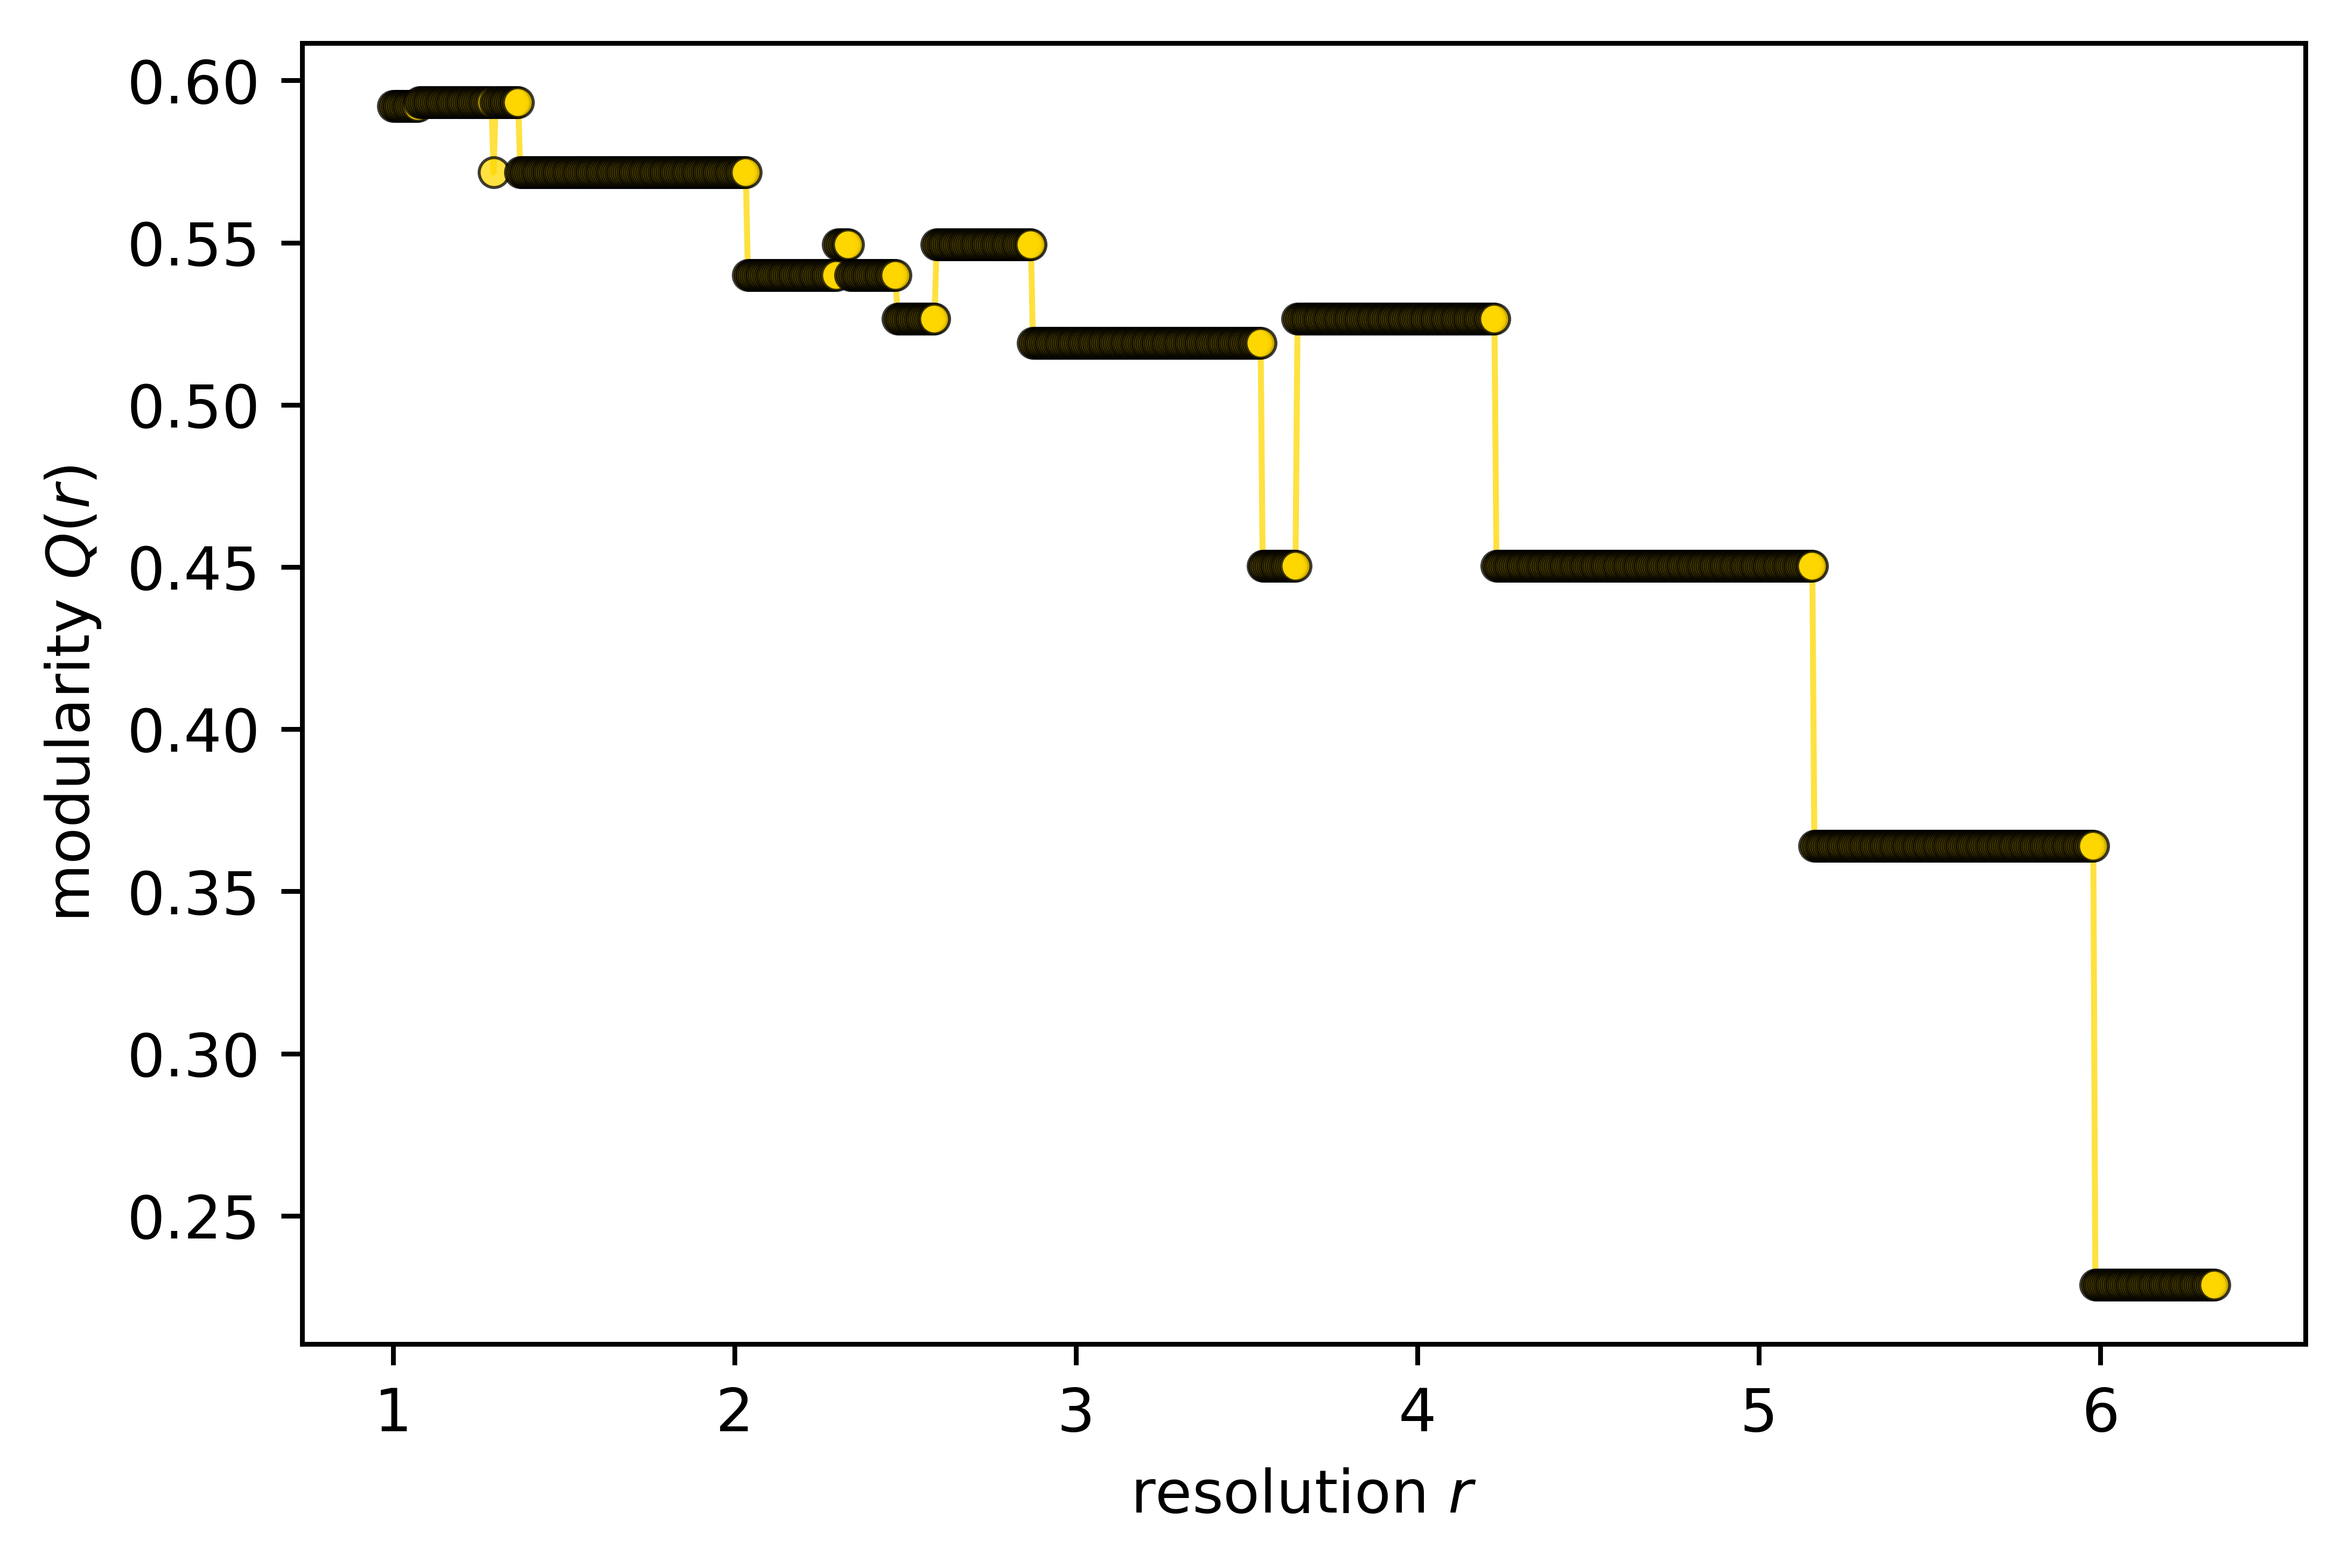

In [84]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)
#plt.title('obsolescent languages',fontsize=12)
ax.plot(modularity.keys(),modularity.values(),marker='o',color='gold',markersize=5,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,linewidth=1,fillstyle='full',clip_on=True)

#ax.plot(X,Y,marker='x',color='k',markersize=6,markeredgewidth=1,markeredgecolor='k',alpha=0.85,linewidth=0,fillstyle='full',clip_on=True,label='Others')

#plt.grid(False)
#plt.legend(loc='best',fontsize=7)
#plt.xticks(rotation=90)
plt.xlabel(r'resolution $r$',fontsize=10)
plt.ylabel(r'modularity $Q(r)$',fontsize=10)
plt.rcParams.update({'font.size': 10})
plt.savefig('Q.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

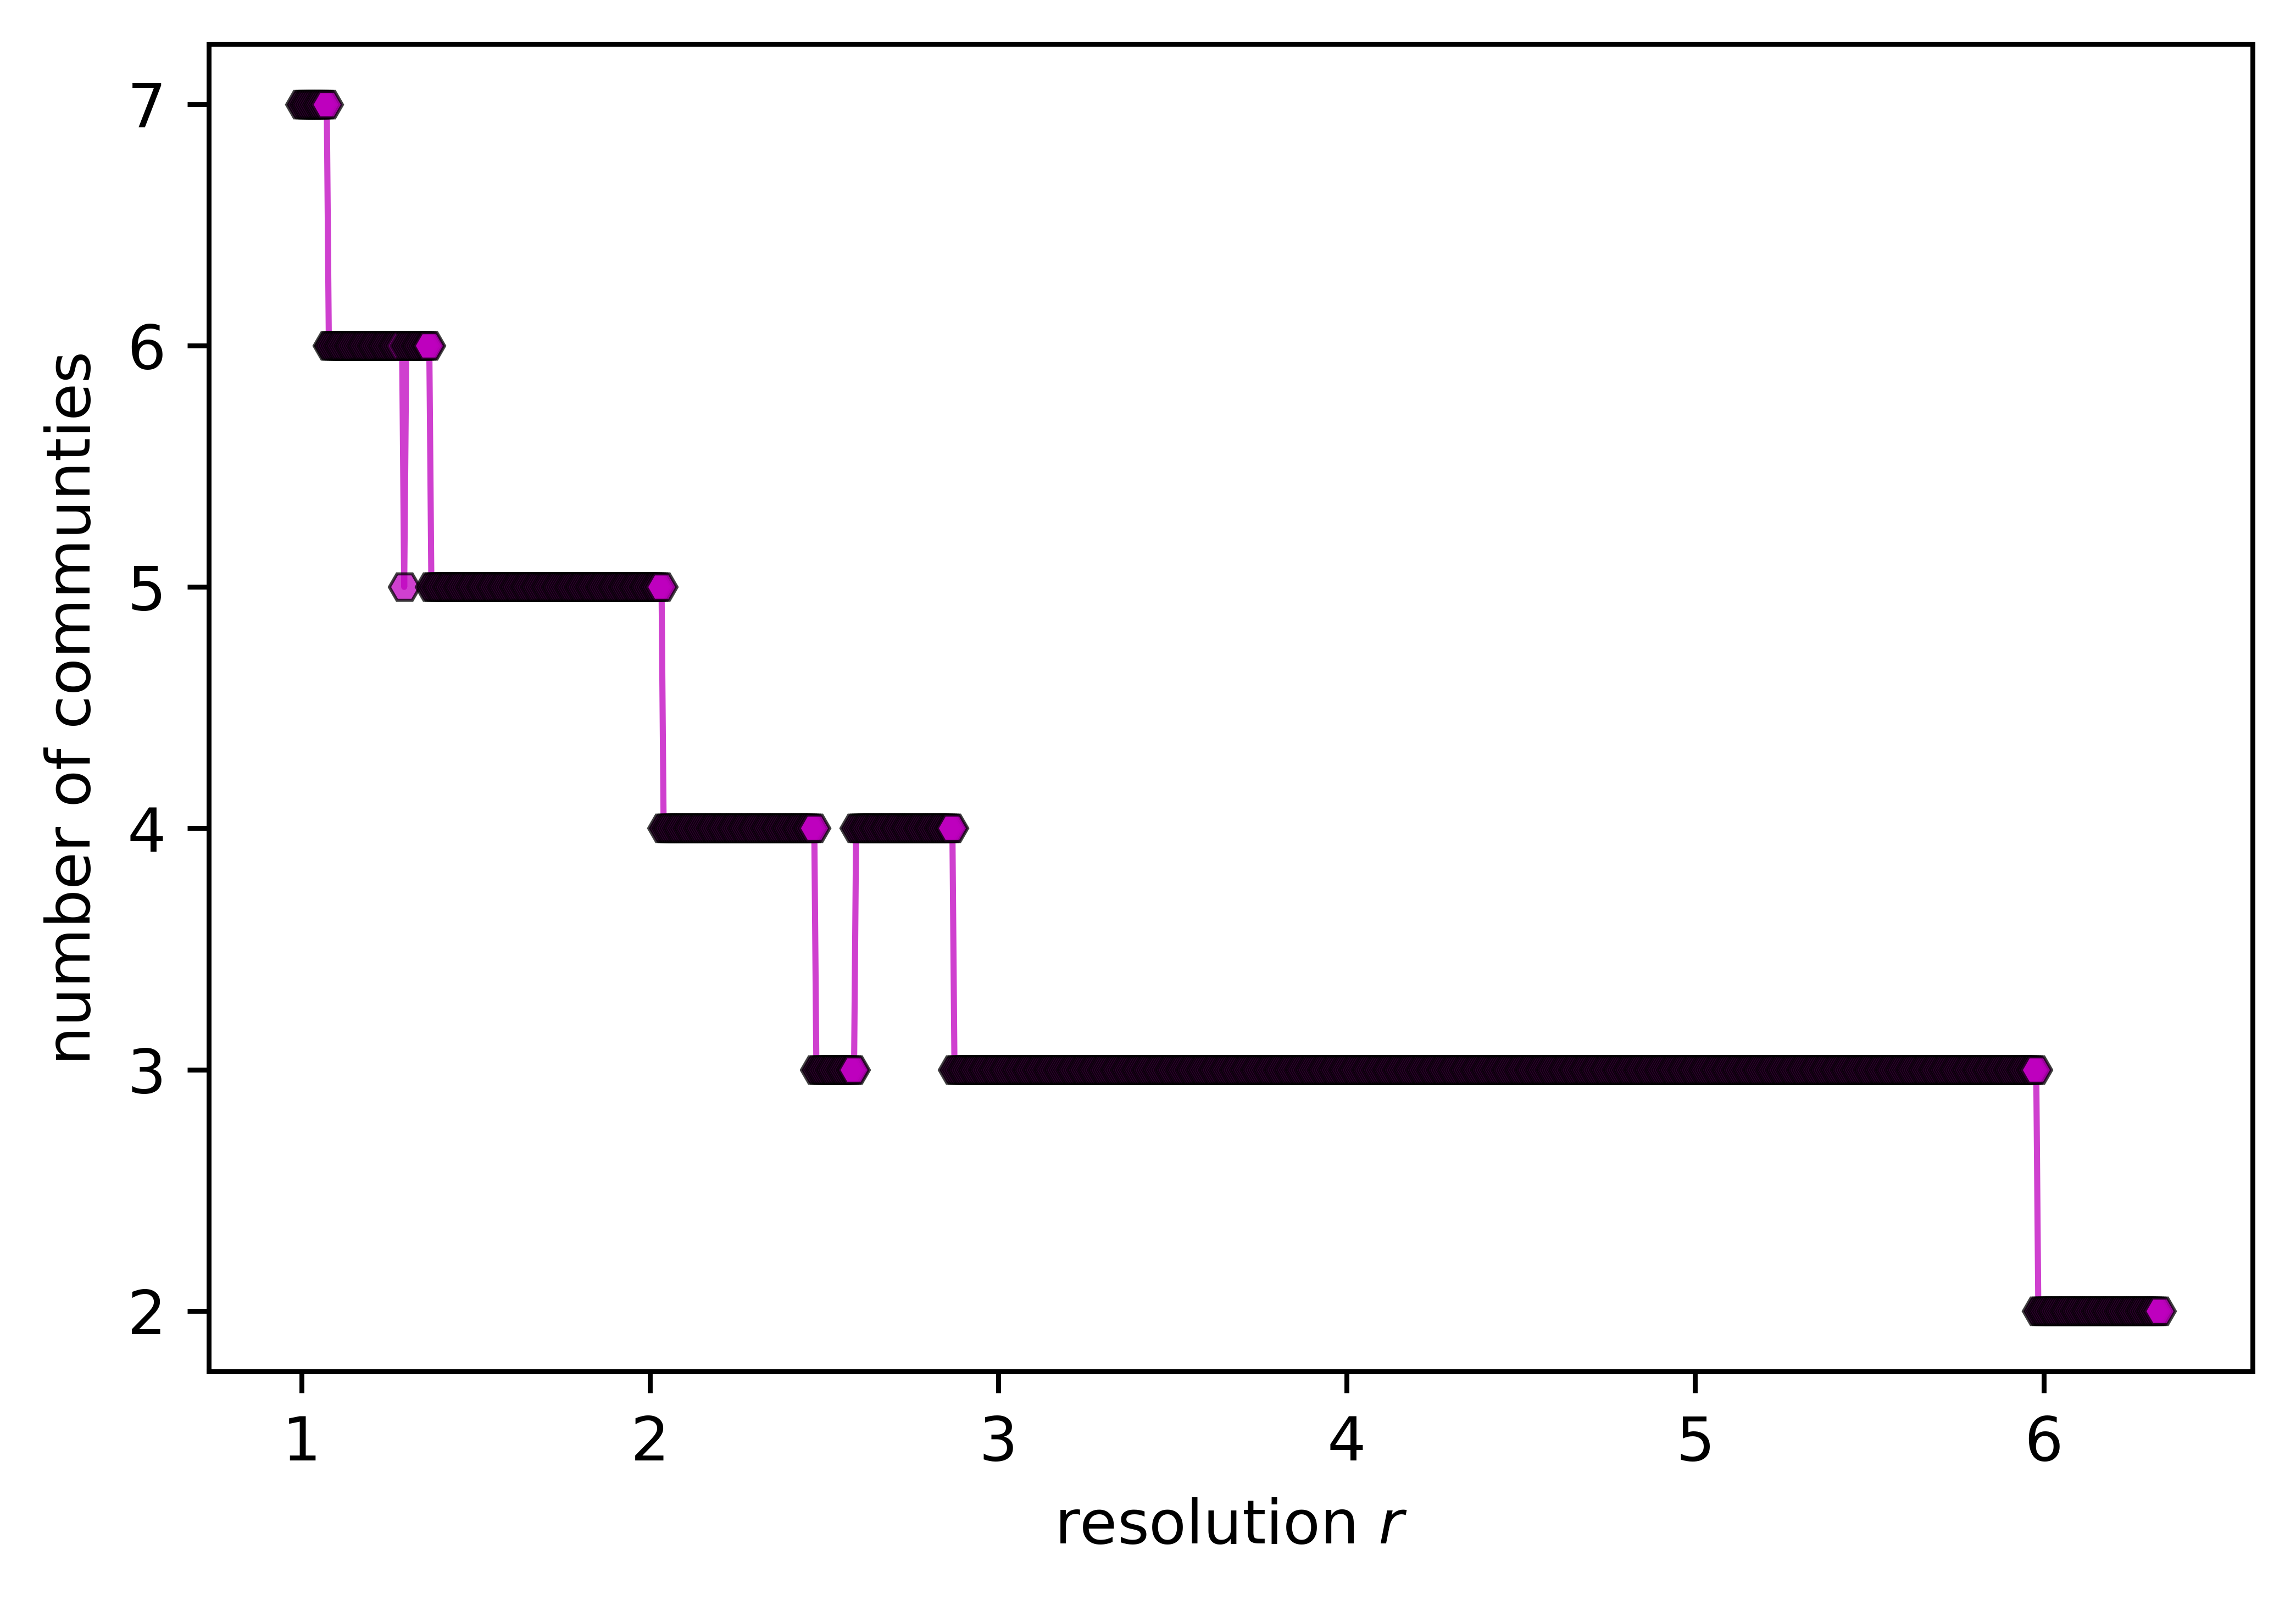

In [85]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)
#plt.title('obsolescent languages',fontsize=12)
ax.plot(number_com.keys(),number_com.values(),marker='H',color='m',markersize=5,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,linewidth=1,fillstyle='full',clip_on=True)

#ax.plot(X,Y,marker='x',color='k',markersize=6,markeredgewidth=1,markeredgecolor='k',alpha=0.85,linewidth=0,fillstyle='full',clip_on=True,label='Others')

#plt.grid(False)
#plt.legend(loc='best',fontsize=7)
#plt.xticks(rotation=90)
plt.xlabel(r'resolution $r$',fontsize=10)
plt.ylabel(r'number of communties',fontsize=10)
plt.rcParams.update({'font.size': 10})
plt.savefig('number.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

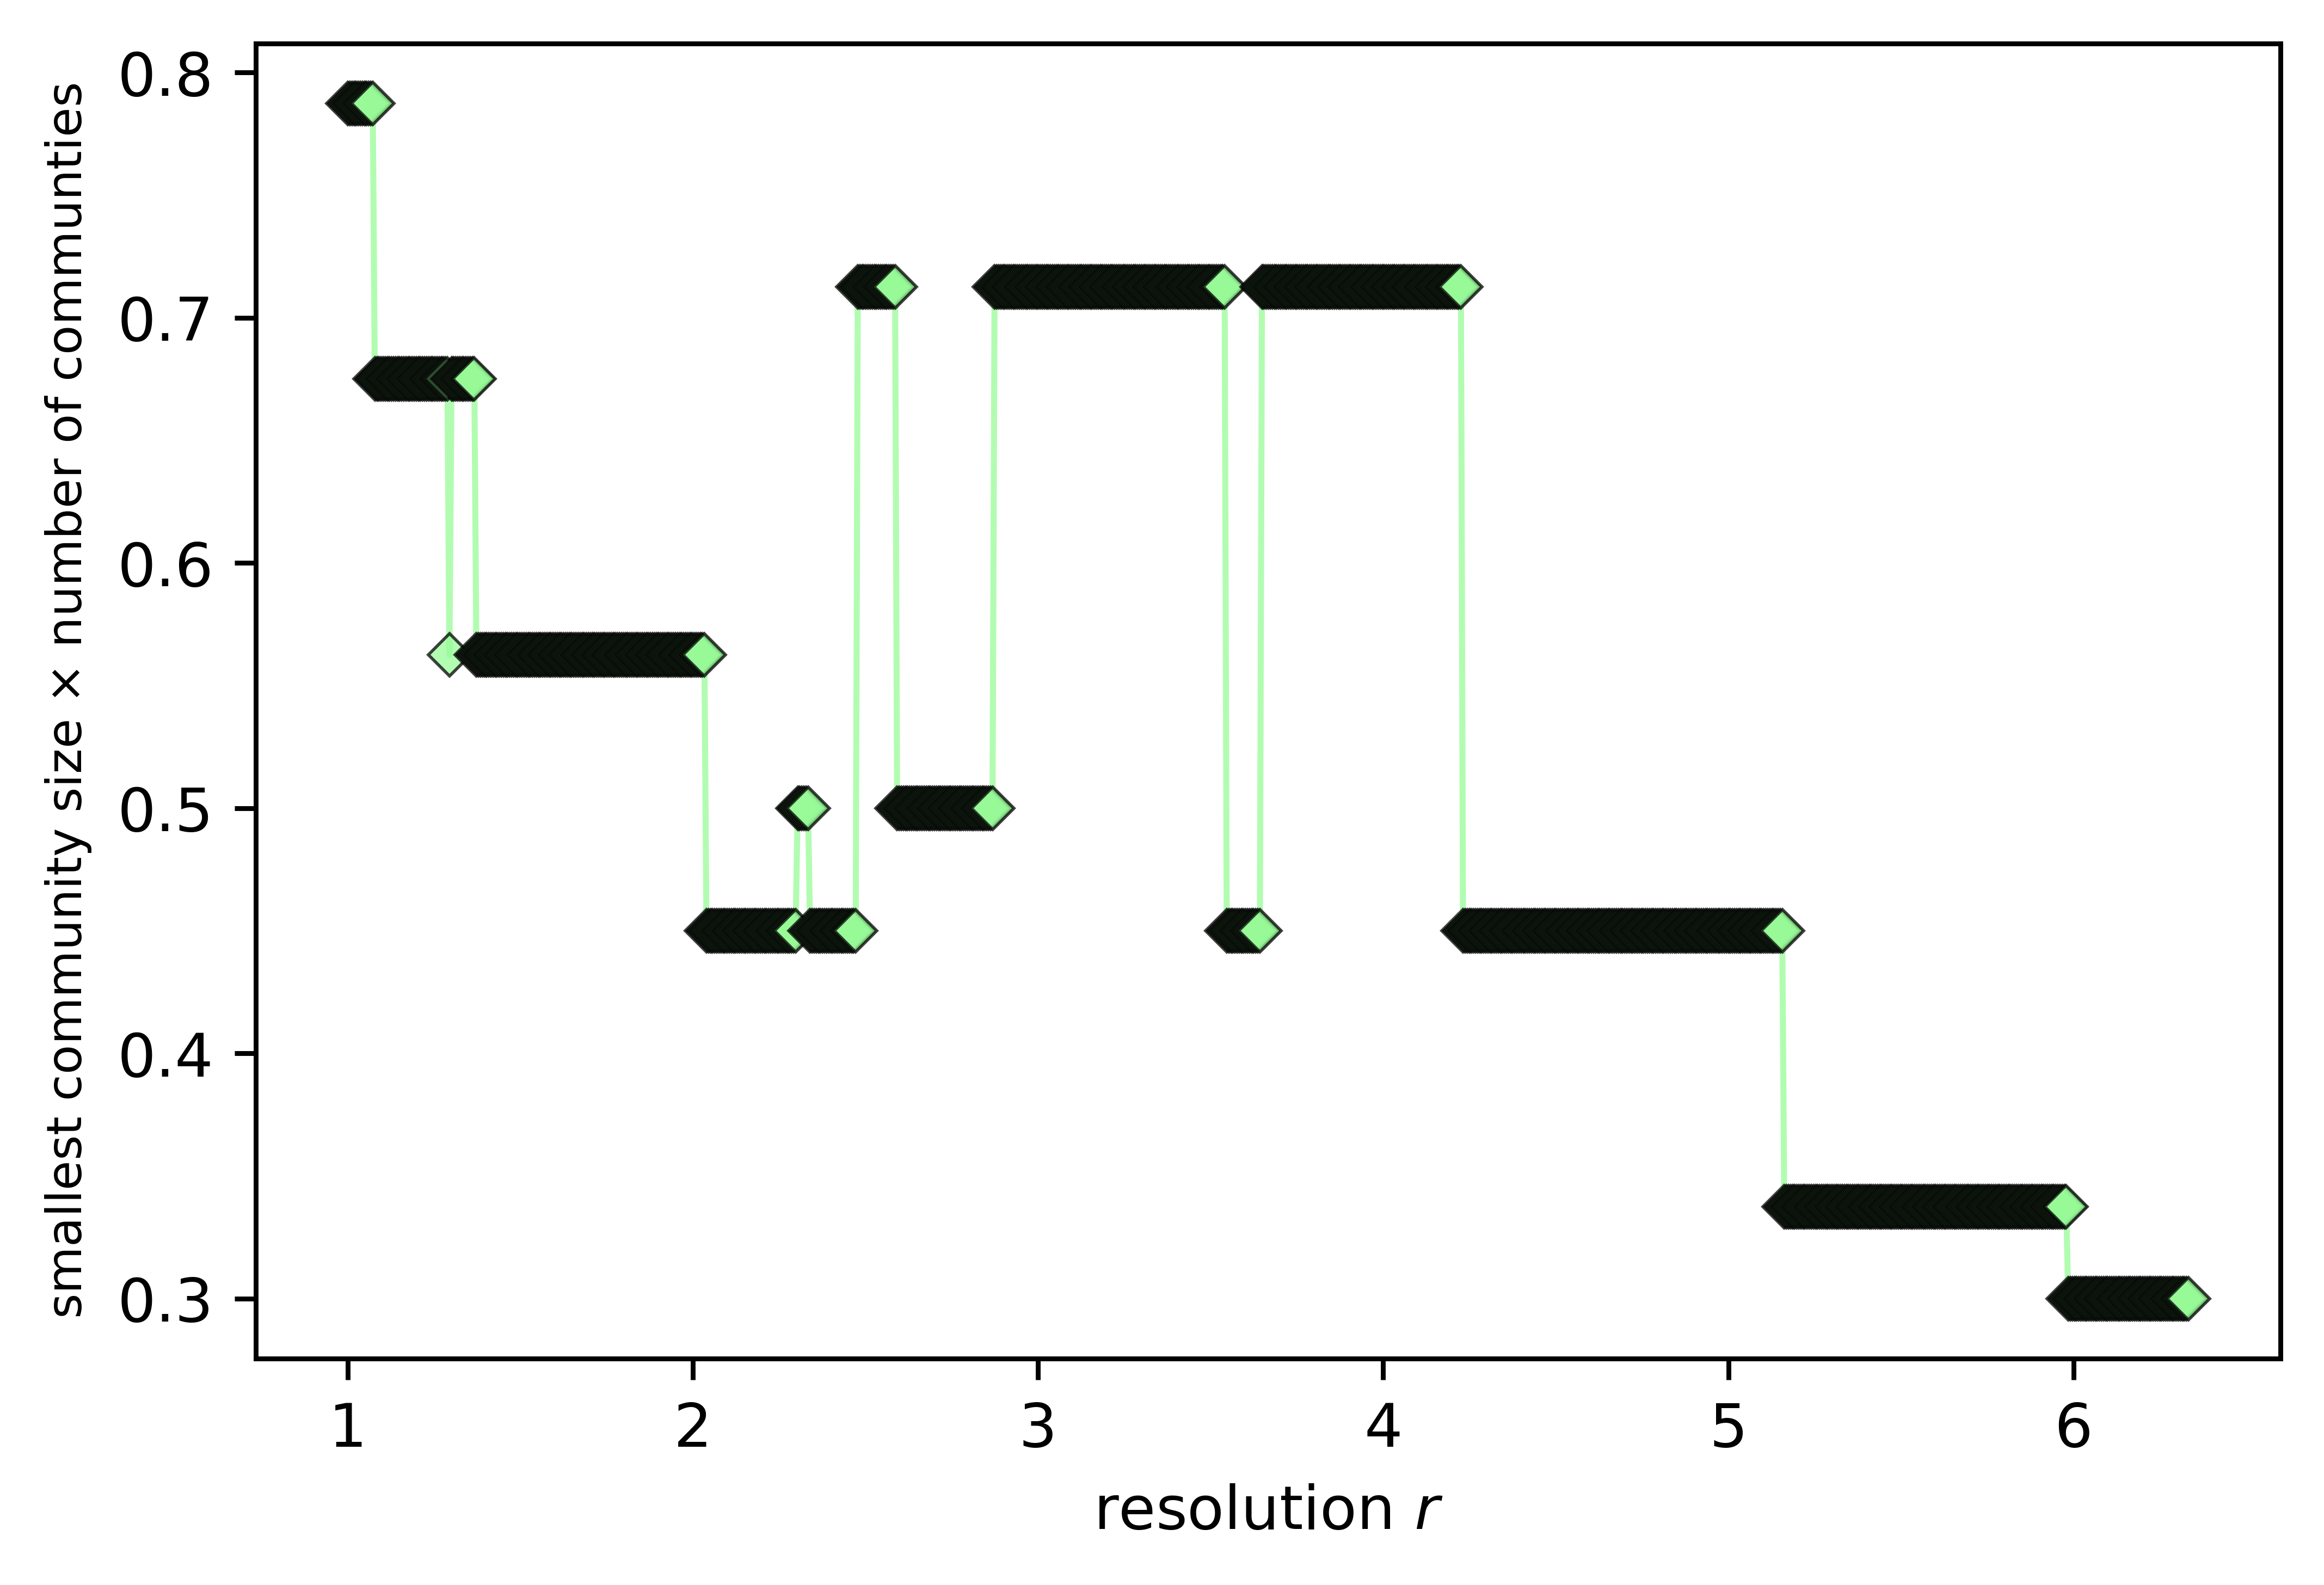

In [86]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)
#plt.title('obsolescent languages',fontsize=12)
ax.plot(EM.keys(),EM.values(),marker='D',color='palegreen',markersize=5,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,linewidth=1,fillstyle='full',clip_on=True)

#ax.plot(X,Y,marker='x',color='k',markersize=6,markeredgewidth=1,markeredgecolor='k',alpha=0.85,linewidth=0,fillstyle='full',clip_on=True,label='Others')

#plt.grid(False)
#plt.legend(loc='best',fontsize=7)
#plt.xticks(rotation=90)
plt.xlabel(r'resolution $r$',fontsize=10)
plt.ylabel(r'smallest community size $\times$ number of communties',fontsize=8)
plt.rcParams.update({'font.size': 8})
plt.savefig('smallest.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [87]:
from itertools import combinations

NUMBER = list(set(number_com.values()))

NUMBER_EVAL = {}

for n in NUMBER:
    QQ = [C[r] for r in C.keys() if number_com[r]==n]
    pairs = list(combinations(QQ, 2))
    AMI = 0
    for pair in pairs:
        AMI+=evaluation.adjusted_mutual_information(pair[0],pair[1]).score
    NUMBER_EVAL[n]=AMI/len(pairs)

In [88]:
NUMBER_EVAL

{2: 1.0, 3: 0.7081407703413197, 4: 0.9005878713844617, 5: 1.0, 6: 1.0, 7: 1.0}

In [89]:
number_com

{1.0: 7,
 1.006006006006006: 7,
 1.012012012012012: 7,
 1.018018018018018: 7,
 1.024024024024024: 7,
 1.03003003003003: 7,
 1.0360360360360361: 7,
 1.042042042042042: 7,
 1.048048048048048: 7,
 1.054054054054054: 7,
 1.06006006006006: 7,
 1.0660660660660661: 7,
 1.072072072072072: 7,
 1.078078078078078: 6,
 1.084084084084084: 6,
 1.09009009009009: 6,
 1.0960960960960962: 6,
 1.102102102102102: 6,
 1.1081081081081081: 6,
 1.1141141141141142: 6,
 1.12012012012012: 6,
 1.1261261261261262: 6,
 1.132132132132132: 6,
 1.1381381381381381: 6,
 1.1441441441441442: 6,
 1.15015015015015: 6,
 1.1561561561561562: 6,
 1.1621621621621623: 6,
 1.1681681681681682: 6,
 1.1741741741741742: 6,
 1.1801801801801801: 6,
 1.1861861861861862: 6,
 1.1921921921921923: 6,
 1.1981981981981982: 6,
 1.2042042042042043: 6,
 1.2102102102102101: 6,
 1.2162162162162162: 6,
 1.2222222222222223: 6,
 1.2282282282282282: 6,
 1.2342342342342343: 6,
 1.2402402402402402: 6,
 1.2462462462462462: 6,
 1.2522522522522523: 6,
 1.25

In [90]:
## caso 1: 3 comunidades

mod_3 = {}

for r in modularity.keys():
    if number_com[r]==3:
        mod_3[r]=modularity[r]

In [91]:
max_M = max(mod_3.values())

In [92]:
max_M

0.5265021810357181

In [93]:
mod_3 = {r:mod_3[r] for r in mod_3.keys() if mod_3[r]==max_M}

In [94]:
from itertools import combinations

QQ = [C[r] for r in mod_3.keys()]
pairs = list(combinations(QQ, 2))
AMI = 0
for pair in pairs:
    AMI+=evaluation.adjusted_mutual_information(pair[0],pair[1]).score
AMI/len(pairs)

1.0

In [95]:
mod_3.keys()

dict_keys([2.4774774774774775, 2.4834834834834836, 2.4894894894894897, 2.4954954954954953, 2.5015015015015014, 2.5075075075075075, 2.5135135135135136, 2.5195195195195197, 2.5255255255255253, 2.5315315315315314, 2.5375375375375375, 2.5435435435435436, 2.5495495495495497, 2.5555555555555554, 2.5615615615615615, 2.5675675675675675, 2.5735735735735736, 2.5795795795795797, 2.5855855855855854, 3.6486486486486487, 3.6546546546546548, 3.6606606606606604, 3.6666666666666665, 3.6726726726726726, 3.6786786786786787, 3.684684684684685, 3.6906906906906904, 3.6966966966966965, 3.7027027027027026, 3.7087087087087087, 3.714714714714715, 3.720720720720721, 3.7267267267267266, 3.7327327327327327, 3.7387387387387387, 3.744744744744745, 3.750750750750751, 3.7567567567567566, 3.7627627627627627, 3.7687687687687688, 3.774774774774775, 3.780780780780781, 3.7867867867867866, 3.7927927927927927, 3.798798798798799, 3.804804804804805, 3.810810810810811, 3.8168168168168166, 3.8228228228228227, 3.828828828828829, 

In [96]:
r = list(mod_3.keys())[0]

v = defaultdict(list)

for key, value in sorted(communities[r].items()):
    v[value].append(key)
    
labels_com = dict(v)

In [97]:
D_com = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in labels_com.items() ]))

In [98]:
D_com.columns = ['area 1', 'area 0', 'area 2']

D_com.to_csv('language_areas.csv',index=False)

In [99]:
labels_fam = {key:[] for key in labels_com}

for key in labels_fam:
    for language in labels_com[key]:
        labels_fam[key]+=[id_family[language]]

In [100]:
D_fam = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in labels_fam.items() ]))

In [101]:
D_fam.columns = ['area 1', 'area 0', 'area 2']

D_fam.to_csv('family_areas.csv',index=False)

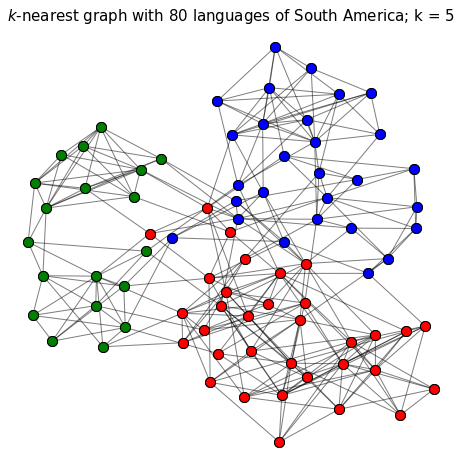

In [102]:
import matplotlib.pyplot as plt

k=5
g = graphs[k]
coms = algorithms.louvain(g,weight='weight',resolution=3)
pos = nx.kamada_kawai_layout(g)
viz.plot_network_clusters(g, coms, pos, node_size=100)
plt.title('$k$-nearest graph with '+str(len(g))+' languages of South America; k = '+str(k),fontsize=15)
plt.savefig('graph.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)

In [103]:
location = {key:location[key] for key in location.keys() if key in communities[r].keys()}

In [104]:
len(location)

80

In [105]:
location

{'agua1253': [-5.30044, -77.9218],
 'apal1257': [1.49792, -54.7457],
 'apur1254': [-8.21692, -66.7714],
 'araw1276': [5.64295, -56.9243],
 'arhu1242': [10.7018, -73.6363],
 'awac1239': [1.21652, -78.3401],
 'awet1244': [-12.381944, -53.391944],
 'ayac1239': [-13.84714, -74.32246],
 'baur1253': [-13.61, -63.68],
 'bora1263': [-2.000259, -72.257066],
 'boro1282': [-16.6029, -55.2004],
 'caja1238': [-7.09314, -78.3214],
 'call1235': [-15.88451, -68.10176],
 'cane1242': [-6.10712, -45.1299],
 'cavi1250': [-13.3544, -66.6277],
 'cent2142': [-17.0, -68.5],
 'chay1248': [-5.63764, -76.8252],
 'chim1309': [10.1902, -74.2559],
 'chip1262': [-18.73951, -67.89633],
 'chol1284': [-9.23129, -75.9621],
 'coca1259': [-4.5, -74.0],
 'colo1256': [-0.21181, -79.2347],
 'cube1242': [1.32382, -70.1939],
 'cusc1236': [-14.0853, -71.7663],
 'daww1239': [-0.1177, -67.2934],
 'desa1247': [0.58157, -69.4955],
 'emer1243': [3.23694, -52.3699],
 'gavi1246': [-10.7235, -61.6752],
 'hixk1239': [-0.16265, -58.80153

In [106]:
x = list(zip(*list(location.values())))[0]
y = list(zip(*list(location.values())))[1]

In [107]:
!pip install git+git://github.com/geopandas/geopandas.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-4aqox36y
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-4aqox36y
You should consider upgrading via the '/home/javier/anaconda3/bin/python3.9 -m pip install --upgrade pip' command.


In [108]:
!pip install descartes

You should consider upgrading via the '/home/javier/anaconda3/bin/python3.9 -m pip install --upgrade pip' command.


In [109]:
import geopandas

In [110]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [111]:
world = world[world['continent']=='South America']

In [112]:
codes = location.keys

In [113]:
latlon = np.vstack([x,y]).T

In [114]:
print(len(latlon))

80


In [115]:
colors_group = {0:['gold','o'],1:['m','s'],2:['palegreen','D'],3:['r','H']}

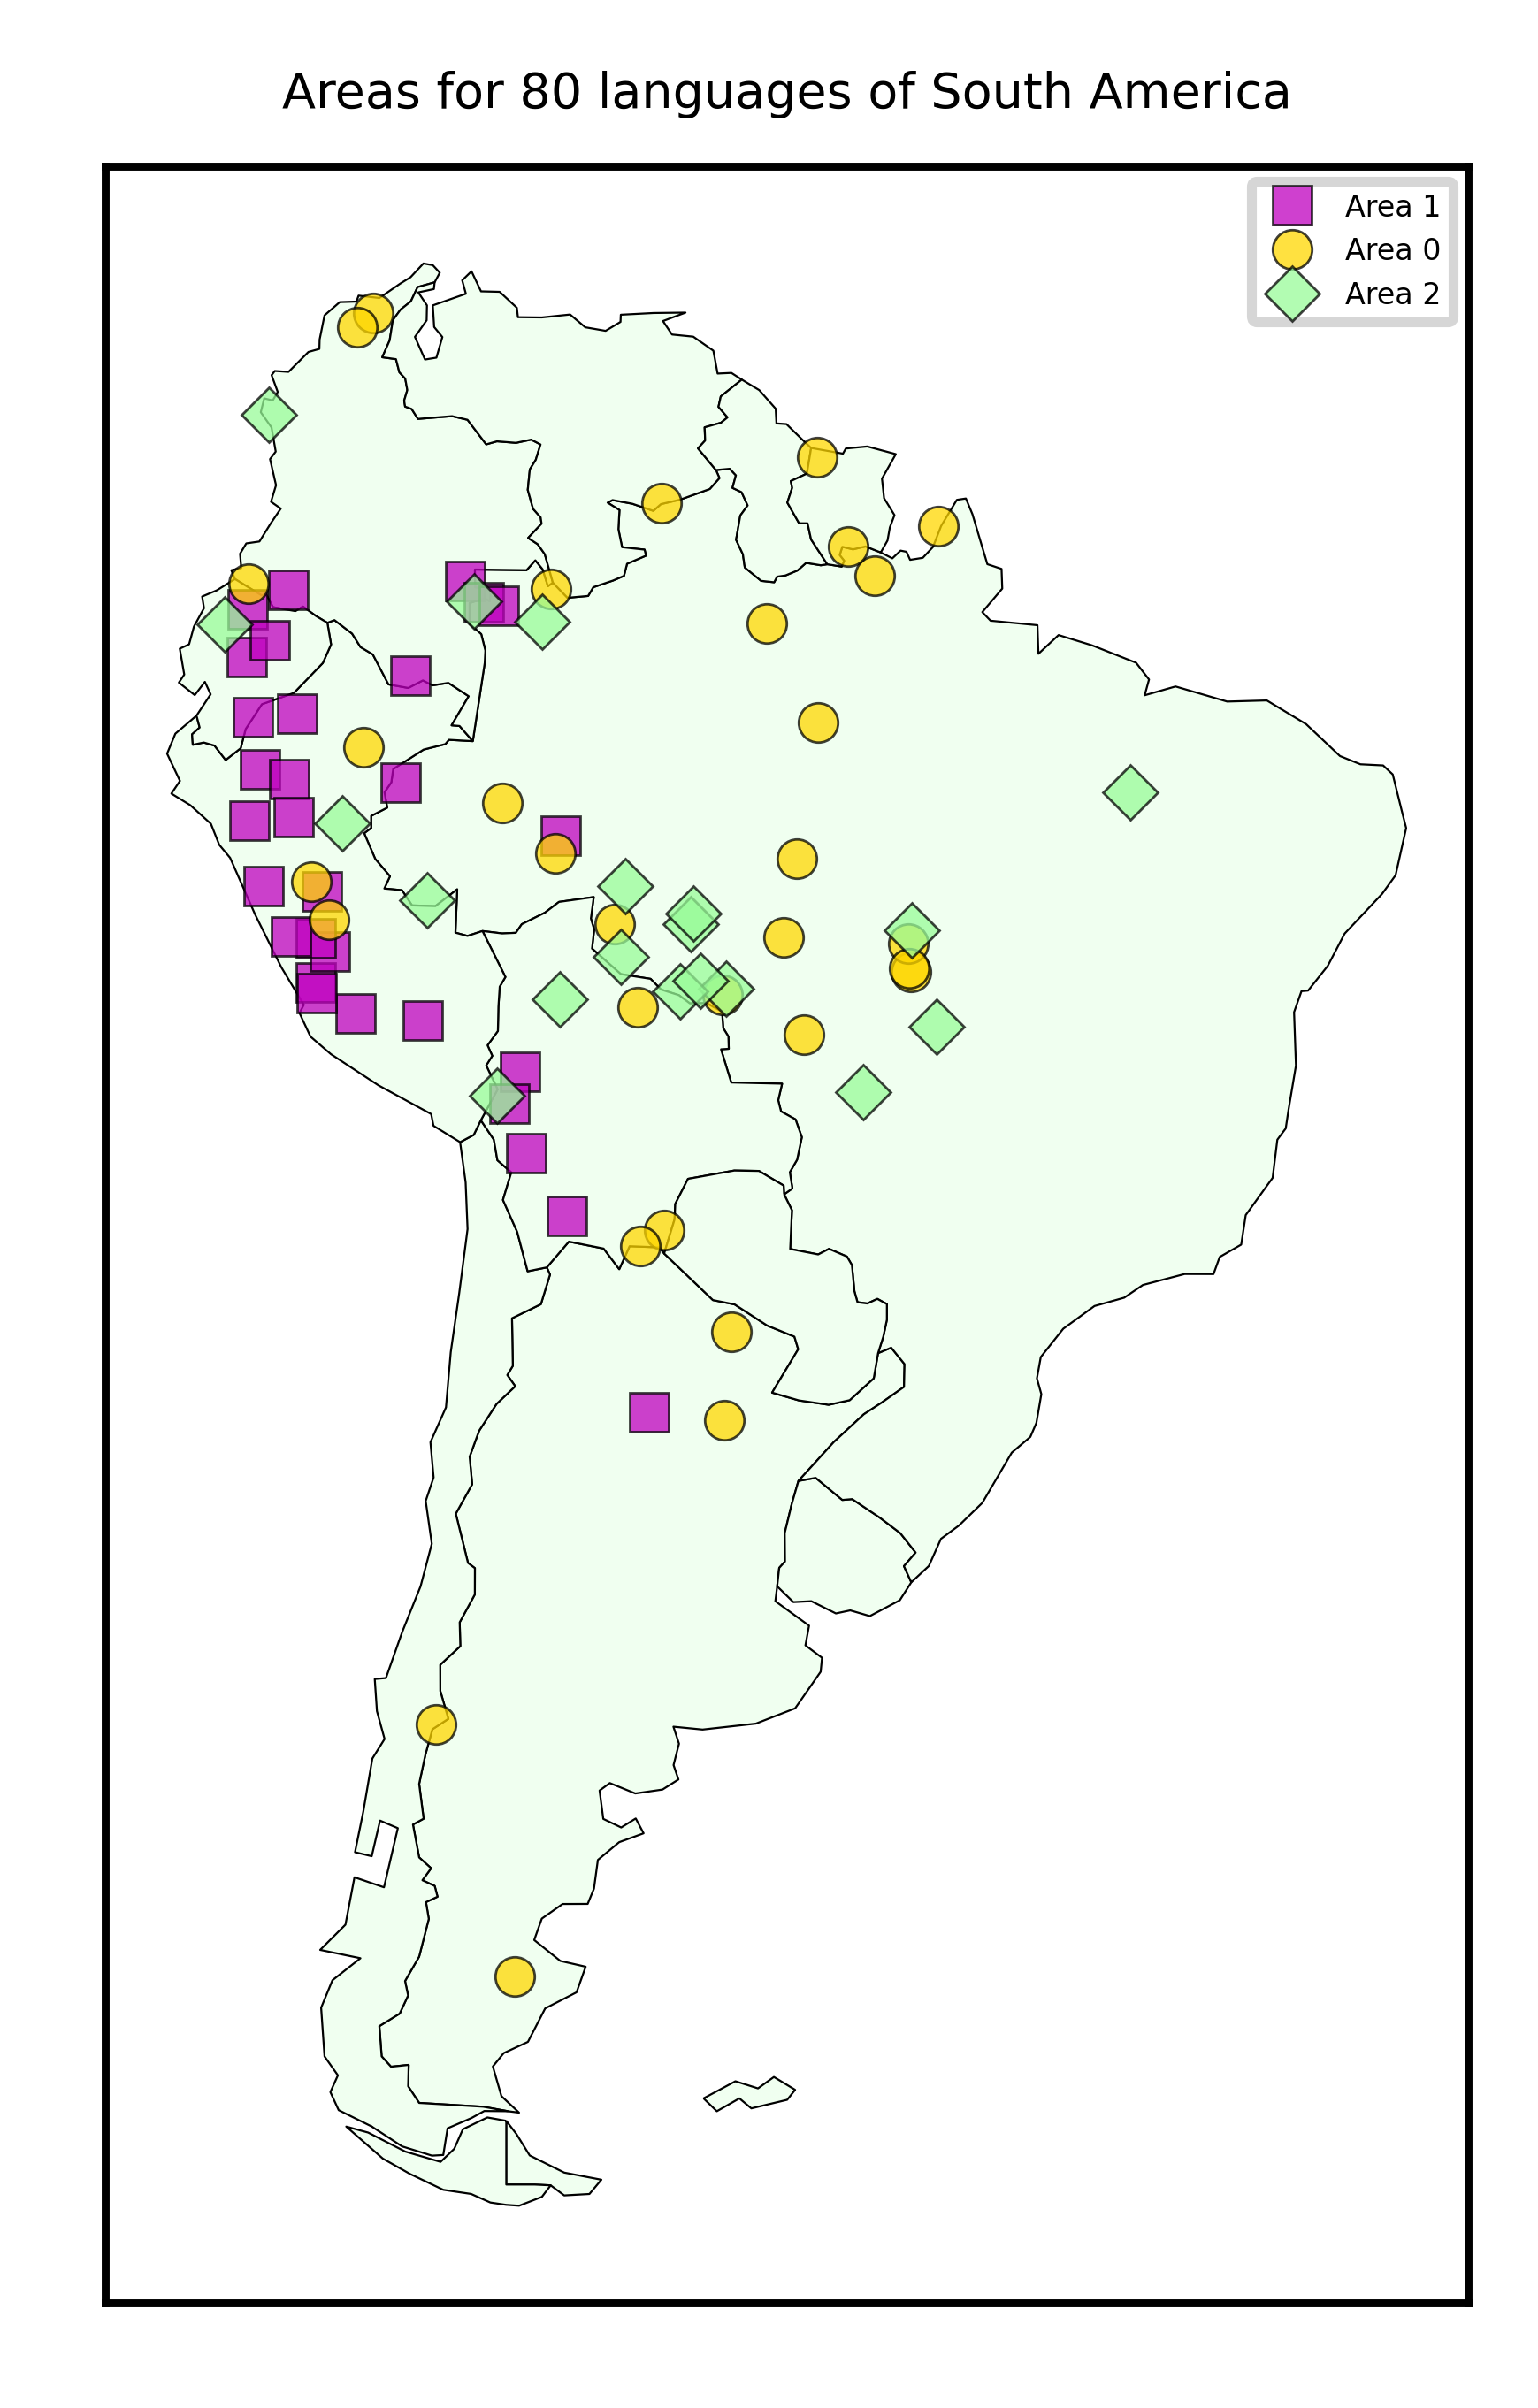

In [116]:
fig, ax = plt.subplots(dpi=800)

ax.set_aspect('equal')
plt.title('Areas for 80 languages of South America',fontsize=5)
world.plot(ax=ax, color='honeydew', edgecolor='k',linewidth=0.2)
    
for group in labels_com.keys():
    
    ax.plot([y[i] for i in [list(location.keys()).index(language) for language in location.keys() if language in communities[r].keys() and communities[r][language]==group]],[x[i] for i in [list(location.keys()).index(language) for language in location.keys() if language in communities[r].keys() and communities[r][language]==group]],marker=colors_group[group][1],color=colors_group[group][0],markersize=4,markeredgewidth=0.25,markeredgecolor='k',alpha=0.75,linewidth=0,fillstyle='full',clip_on=True,label='Area '+str(group))

#for language in location.keys():
#    if language in languages_conflict:
#        ax.annotate(max(probs[language].round(2)), weight='demi', color='k', xy=(location[language][1],location[language][0]), fontsize=2.5, alpha=0.85)

#for fam in families:
    
#    ax.plot([y[i] for i in [list(location.keys()).index(language) for language in location.keys() if language in id_family.keys() and id_family[language]==fam]],[x[i] for i in [list(location.keys()).index(language) for language in location.keys() if language in id_family.keys() and id_family[language]==fam]],marker=colors[fam][1],color=colors[fam][0],markersize=3,markeredgewidth=0.25,markeredgecolor='k',alpha=0.75,linewidth=0,fillstyle='full',clip_on=True,label=fam)

#ax.plot([x[i] for i in [list(LL_families.keys()).index(language) for language in L.keys() if macroarea[language]=='North America']],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if macroarea[language]=='North America']],'*',color='m',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='North America')
#ax.plot([y[i] for i in [list(location.keys()).index(language) for language in location.keys() if (language not in id_family.keys()) or (language in id_family.keys() and id_family[language] not in families)]],[x[i] for i in [list(location.keys()).index(language) for language in location.keys() if (language not in id_family.keys()) or (language in id_family.keys() and id_family[language] not in families)]],marker='x',color='k',markersize=3,markeredgewidth=1,markeredgecolor='k',alpha=0.65,linewidth=0,fillstyle='full',clip_on=True,label='Others')

plt.legend(loc='best',fontsize=3)
ax.set_yticks([])
ax.set_xticks([])
plt.savefig('mapa.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

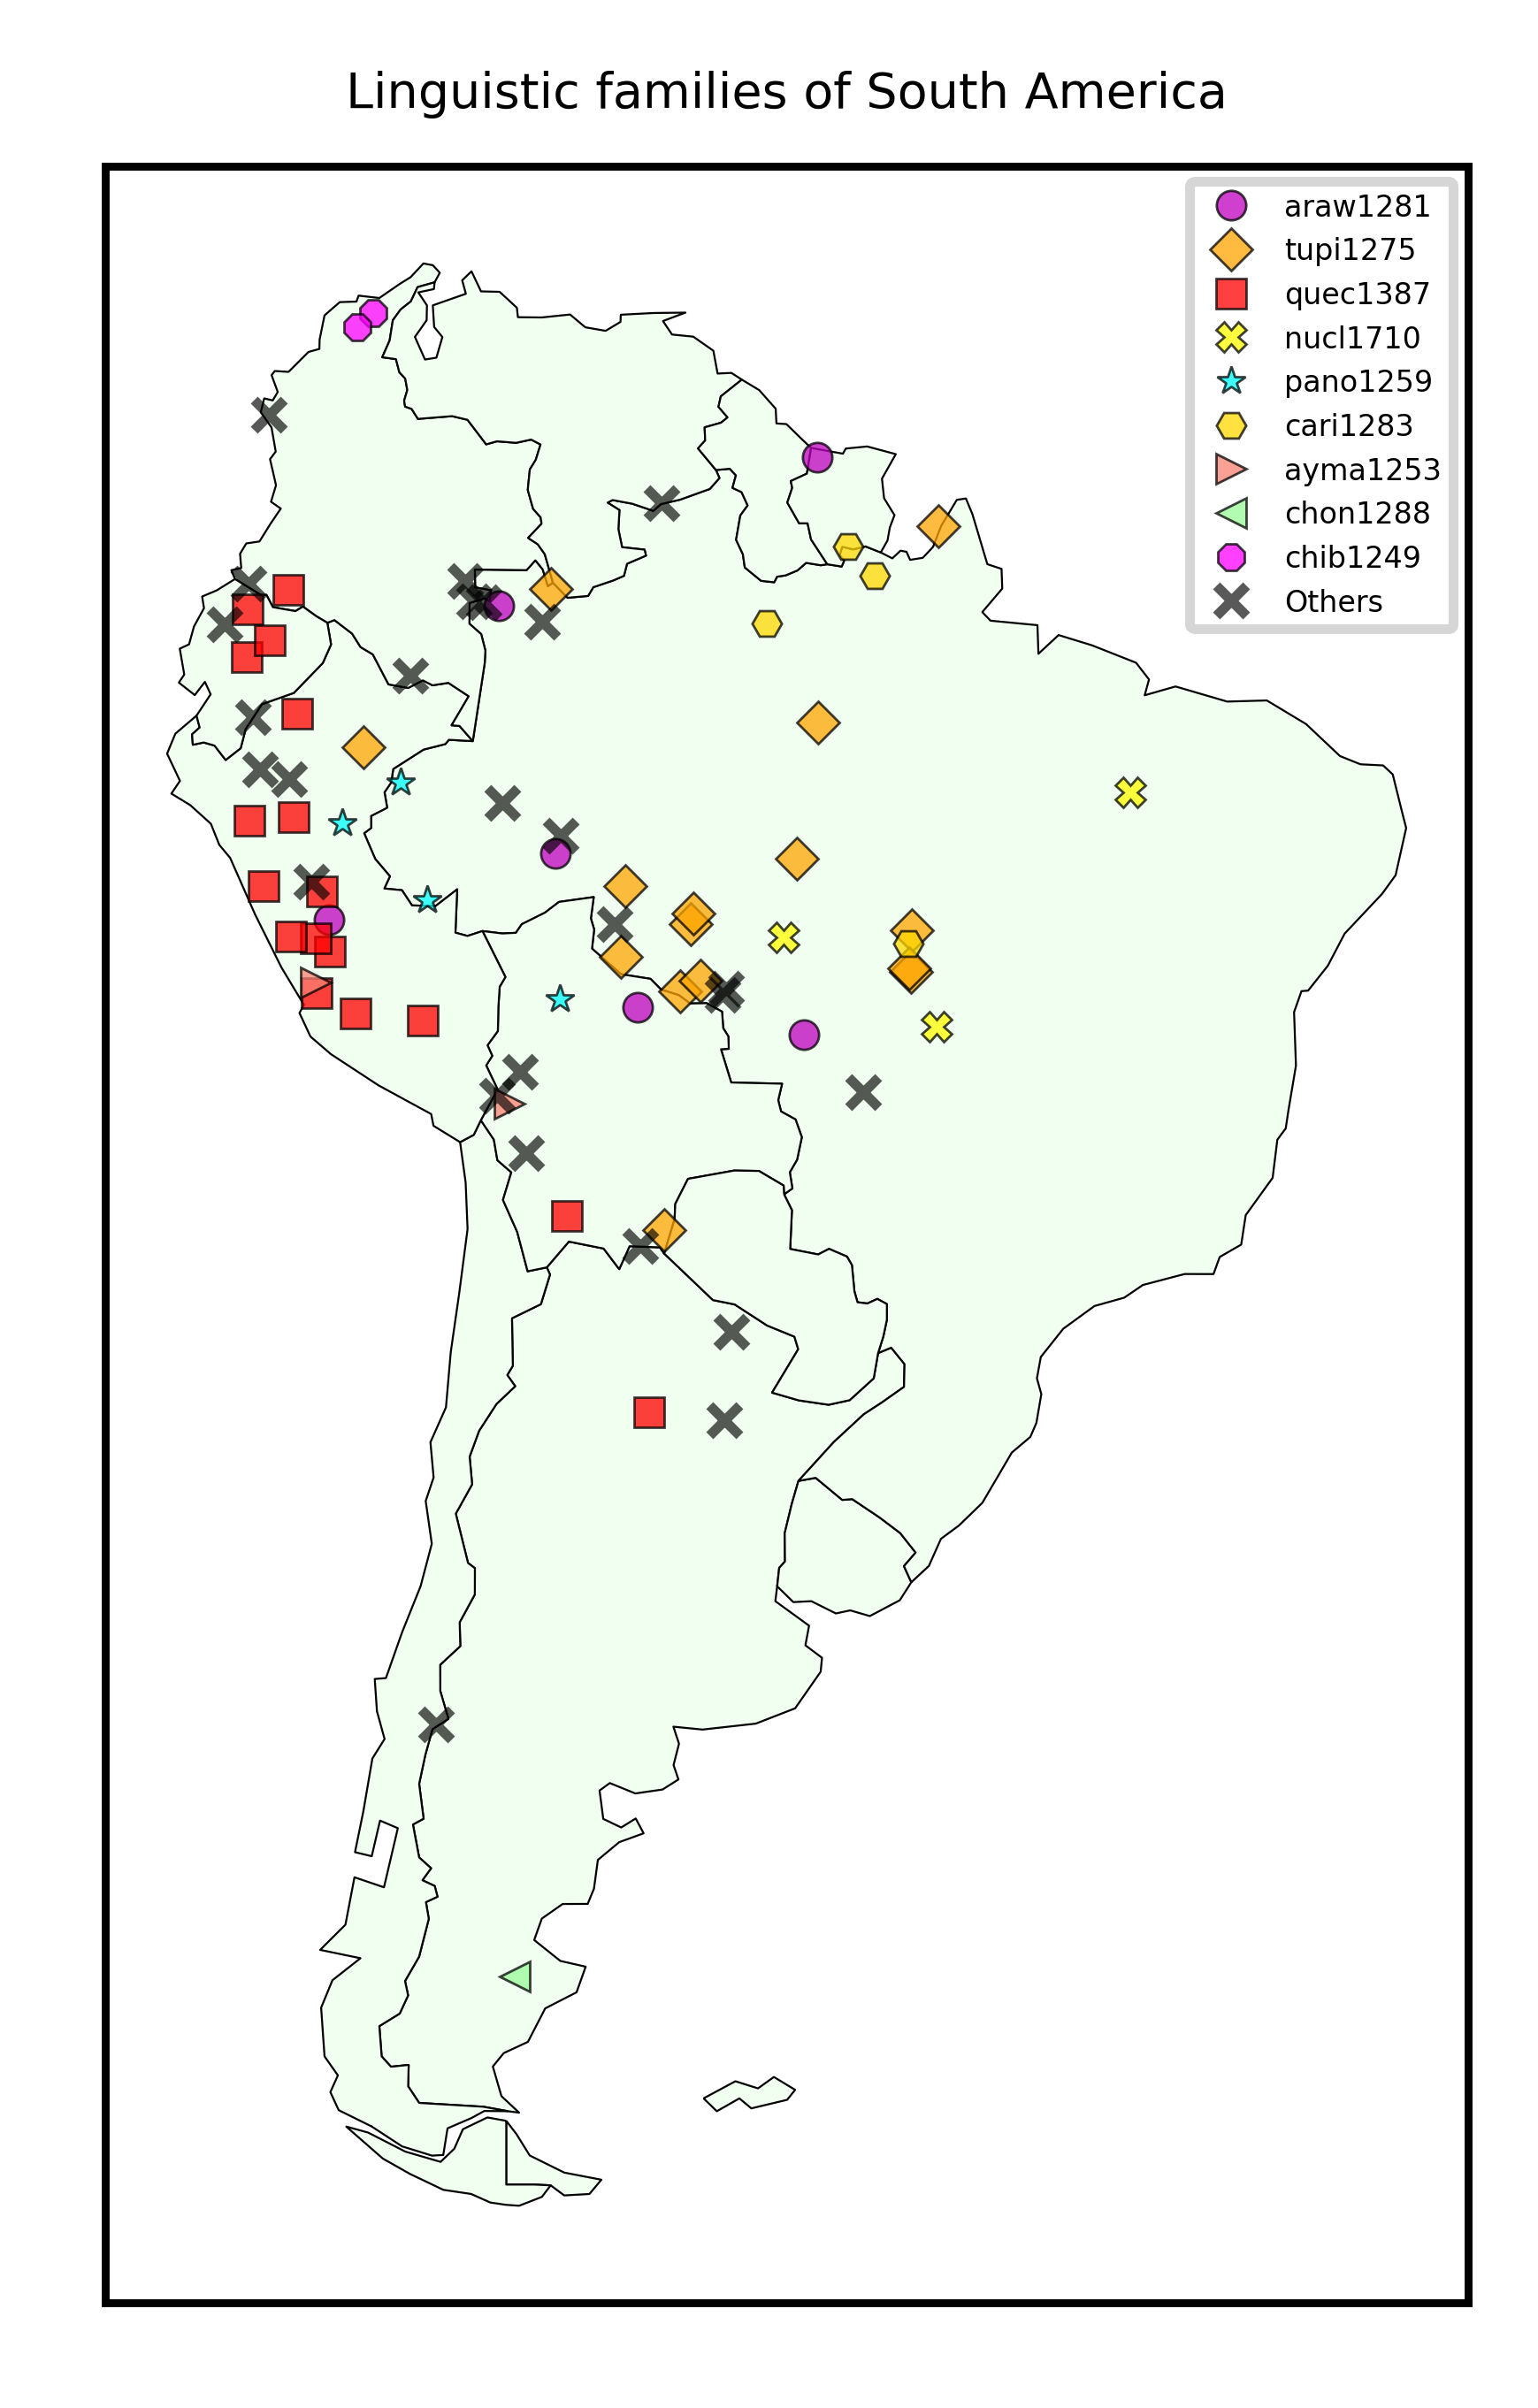

In [117]:
fig, ax = plt.subplots(dpi=800)

ax.set_aspect('equal')
plt.title('Linguistic families of South America',fontsize=5)
world.plot(ax=ax, color='honeydew', edgecolor='k',linewidth=0.2)
    
#for group in labels_group.keys():
    
#    ax.plot([y[i] for i in [list(location.keys()).index(language) for language in location.keys() if language in labels.keys() and labels[language]==group]],[x[i] for i in [list(location.keys()).index(language) for language in location.keys() if language in labels.keys() and labels[language]==group]],marker=colors_group[group][1],color=colors_group[group][0],markersize=4,markeredgewidth=0.25,markeredgecolor='k',alpha=0.75,linewidth=0,fillstyle='none',clip_on=True,label=group)

#for language in location.keys():
#    if language in languages_conflict:
#        ax.annotate(max(probs[language].round(2)), weight='demi', color='k', xy=(location[language][1],location[language][0]), fontsize=2.5, alpha=0.85)

for fam in families:
    
    ax.plot([y[i] for i in [list(location.keys()).index(language) for language in location.keys() if language in id_family.keys() and id_family[language]==fam]],[x[i] for i in [list(location.keys()).index(language) for language in location.keys() if language in id_family.keys() and id_family[language]==fam]],marker=colors[fam][1],color=colors[fam][0],markersize=3,markeredgewidth=0.25,markeredgecolor='k',alpha=0.75,linewidth=0,fillstyle='full',clip_on=True,label=fam)

#ax.plot([x[i] for i in [list(LL_families.keys()).index(language) for language in L.keys() if macroarea[language]=='North America']],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if macroarea[language]=='North America']],'*',color='m',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='North America')
ax.plot([y[i] for i in [list(location.keys()).index(language) for language in location.keys() if (language not in id_family.keys()) or (language in id_family.keys() and id_family[language] not in families)]],[x[i] for i in [list(location.keys()).index(language) for language in location.keys() if (language not in id_family.keys()) or (language in id_family.keys() and id_family[language] not in families)]],marker='x',color='k',markersize=3,markeredgewidth=1,markeredgecolor='k',alpha=0.65,linewidth=0,fillstyle='full',clip_on=True,label='Others')

plt.legend(loc='best',fontsize=3)
ax.set_yticks([])
ax.set_xticks([])
plt.savefig('mapa_fam.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()